In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

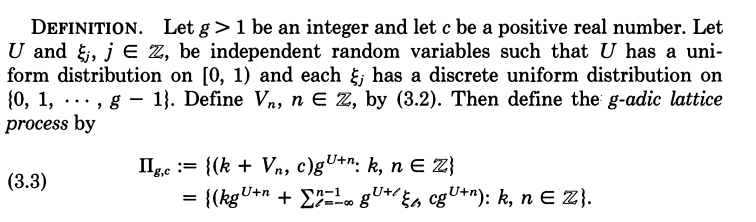

In [2]:
# This object is to generate the points of g-adic process, with some build-in plots functions 
class PISet:
    def assign_sign(self, i):
        return 1 if (i%2 == 0) else -1

    def __init__(self, seed, g, c, l,krange,nrange, positive = True):
        np.random.seed(seed)
        # since we cannot simulate n,k over Z, so here we restrict them into small ranges
        self.krange = krange 
        self.nrange = nrange
        self.seed = seed
        
        # same as the g, c in g-adic process
        self.g = g
        self.c = c
        
        # lower bound of l in g-adic process
        self.l = l
        self.l_range = np.array(range(l, 2))
        
        # generate random numbers from range {0,1,....,g - 1} since eta_l is a uniform r.v. from that range
        self.eta = np.random.randint(low = 0, high = g - 1, size = abs(l) + 2)
        
        # randomly generate a U for U in g-adic process
        self.U = np.random.uniform(0,1,1)[0]
        
        # sum of g^{U+l}*eta_l in g-adic process
        self.const_term = sum(g**(self.U+self.l_range) * self.eta)
        
        # list that store the points pair in g-adic process
        self.points = []
        
        # Gemerate Points for Pi
        for i in np.array(range(self.nrange[0],self.nrange[1]+1)):
            for j in np.array(range(self.krange[0],self.krange[1]+1)):
                # generate points from g-adic process, but assign the jumps with alternating signs according to their size
                # for example, assign positive for g^{U+n} if i is even, assign negative if i is odd
                self.points.append((j*g**(self.U+i) + self.const_term, self.c*g**(self.U+i) * self.assign_sign(i)))
        
        # For convience to plot the process, sort them by x-coordinate
        self.points.sort()
        
        # only show x-coordinate >= 0
        if positive:
            self.points = [point for point in self.points if point[0] >= 0]
    
    # X(t) -> a^H * X(t)
    def y_trans(self, y,a,H):
        return y * (a**H)
    
    # sum over x for (x, v) from g-adic process, get the points for self-similar process
    def point_trans(self):
        L = {}
        for point in self.points:
            L[point[0]] = L.get(point[0], 0) + point[1]
        trans_point  = [(k,L[k]) for k in L]
        return trans_point
    
    # store (t, X(t)) pairs by given t and a
    def calculate_function(self, points, t, a = 1):
        #points = ProdSet.points
        x = []
        y = []
        cur_sum = 0
        for i in range(len(points)):
            if points[i][0] > a*t: # make points x-coordinate < at
                break
            x.append(points[i][0])
            cur_sum += points[i][1]
            y.append(cur_sum)
        return np.array(x), np.array(y)
    
    def make_plot_Xt(self, t, a = 1):
        points = self.point_trans()
        x,y = self.calculate_function(points, t ,a)
        if a != 1:
            x = [p/a for p in x if p<= t] # limit x-coordinate to the same range in plot
            y = y[:len(x)] 
        plt.step(x, y, where = "pre")
        # Add labels and title
        plt.xlabel('Time t')
        plt.ylabel('Y')
        plt.title('Process X(at), a = {}'.format(a))
    
    def make_plot_aH_Xt(self, t, a = 1, H = 1):
        points = self.point_trans()
        x,y = self.calculate_function(points, t)
        y = self.y_trans(y,a,H) # transform to a^H * X(t)
        plt.step(x, y, where = "pre")
        # Add labels and title
        plt.xlabel('Time t')
        plt.ylabel('Y')
        plt.title('Process a^H * X(t), a = {}, H = {}'.format(a, H))

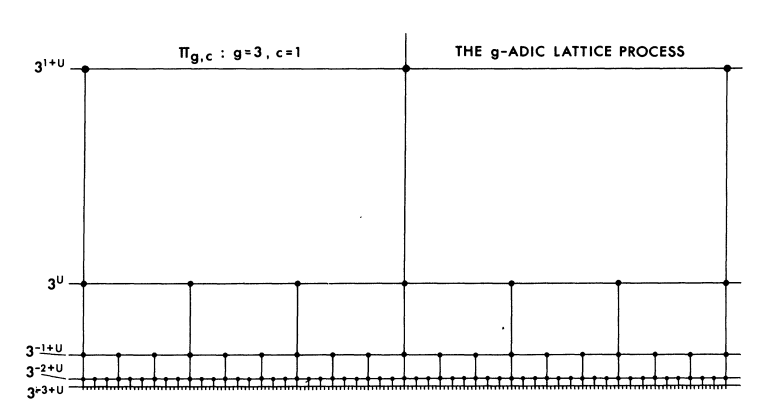

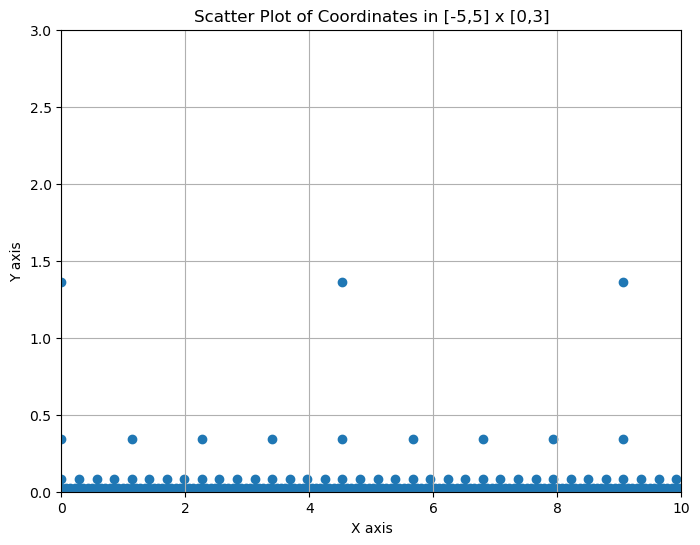

In [3]:
# set up all variables for set PI
seed = 11
g = 2
c = 0.3
l = -300
krange = [-2000,2000]
nrange = [-10,10]
a = 2.73
H = 3.14
S  = PISet(seed,g,c,l,krange,nrange)

filtered_data = [point for point in S.points if 0 <= point[0] <= 5 and 0 <= point[1] <= 3]

# Unpacking the filtered list of tuples into x and y coordinates
x_filtered, y_filtered = zip(*S.points) if filtered_data else ([], [])

# Creating the scatter plot as the picture above
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered)
plt.title('Scatter Plot of Coordinates in [-5,5] x [0,3]')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.xlim(0, 10)
plt.ylim(0, 3)
plt.grid(True)
plt.show()

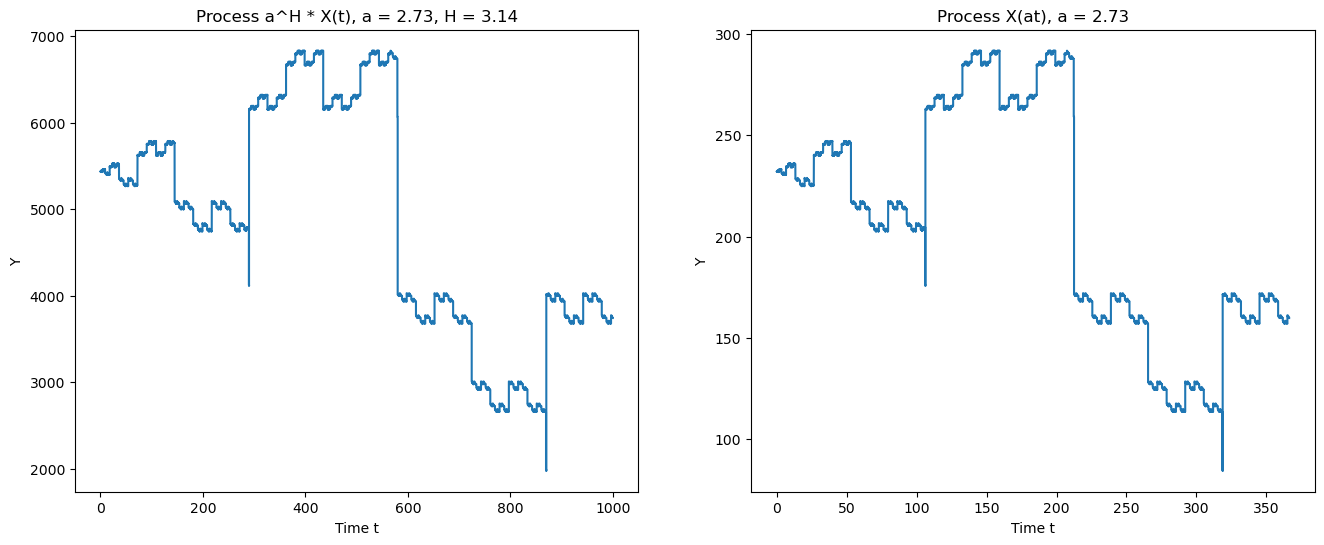

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# set up t
t = 1000

# Plot the step function, which is the plot of process
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
S.make_plot_aH_Xt(t,a,H)


plt.subplot(1, 2, 2)
S.make_plot_Xt(t,a)

plt.show()

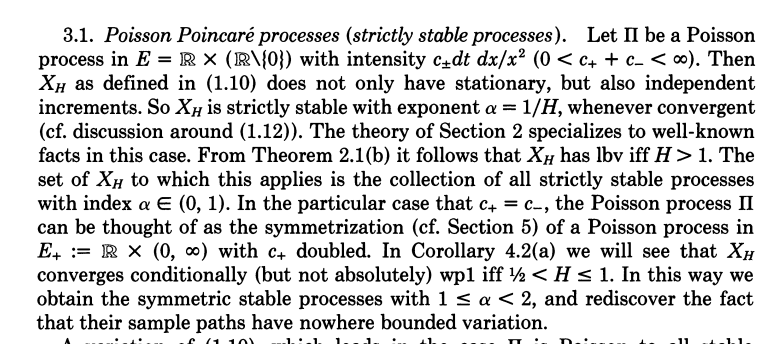

In [5]:
# Generate the points for the Poisson Poincar process, but I am not sure if this is correct
class PISetPOI(PISet):
    def __init__(self, seed, c, intensity, card, positive = True):
        np.random.seed(seed)
        self.seed = seed
        self.c = c
        self.intensity = intensity
        self.card = card # number of points in the process
        jump_loc = np.random.exponential(c/intensity, card) # location of jump
        jump_size = np.random.exponential(1/intensity, card) # size of jump
        self.points = []
        for i in range(card):
        # assign the jumps with alternating signs according to their size
        # for example, assign positive for jump_size if i is even, assign negative if i is odd
            if len(self.points) == 0:
                self.points.append((jump_loc[i], jump_size[i] * self.assign_sign(i)))
            else:
                self.points.append((jump_loc[i] + self.points[-1][0], jump_size[i] * self.assign_sign(i)))
        self.points.sort()
        if positive:
            self.points = [point for point in self.points if point[0] >= 0] 

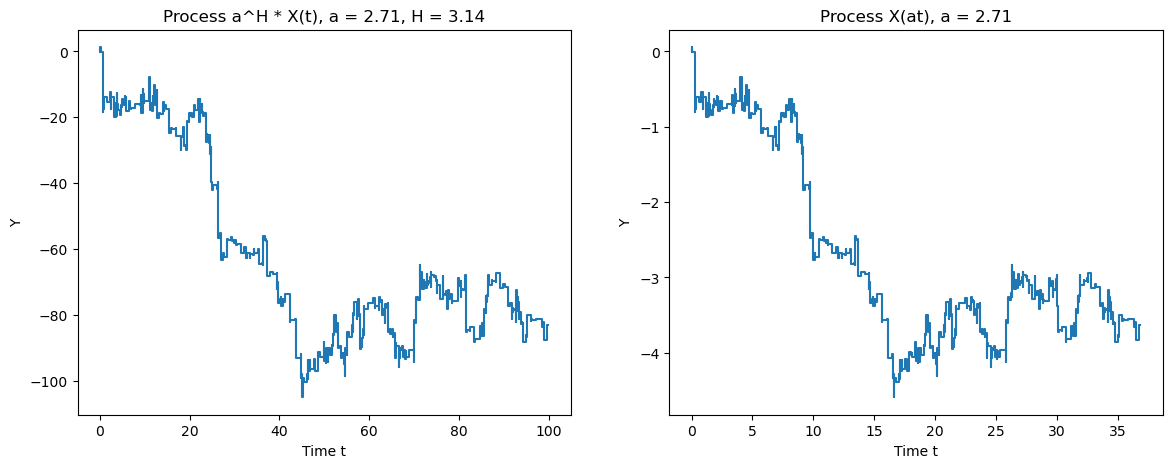

In [6]:
# set up all variables for the generating set
c = 2
intensity = 8
a = 2.71
H = 3.14
card = 1000 # 1000 points in the set
Spoi = PISetPOI(11,c, intensity,card)

# set up t
t = 100


# plot the process
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
Spoi.make_plot_aH_Xt(t,a,H)


plt.subplot(1, 2, 2)
Spoi.make_plot_Xt(t,a)